In [99]:
import datetime

import fbprophet.plot as fp
from fbprophet import Prophet 
import jpholiday
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

In [108]:
df_train = pd.read_csv('../input/train.csv')
df_test = pd.read_csv('../input/test.csv')
df_train.index = pd.to_datetime(df_train['datetime'])
#df_test.index = pd.to_datetime(df_test['datetime'])


In [177]:
# 使い道がなくなりました
def isHoliday(DATETIME):
    """指定した日が平日なら0、土日祝日なら1を返す"""
    if type(DATETIME) != 'object':
        DATE = str(DATETIME)
        
    Date = (datetime.datetime.strptime(DATE, '%Y-%m-%d')).date()
    if Date.weekday() >= 5 or jpholiday.is_holiday(Date):
        return 1
    else:
        return 0

In [102]:
df_train['holiday'] = df_train['datetime'].apply(isHoliday)
df_test['holiday'] = df_test['datetime'].apply(isHoliday)

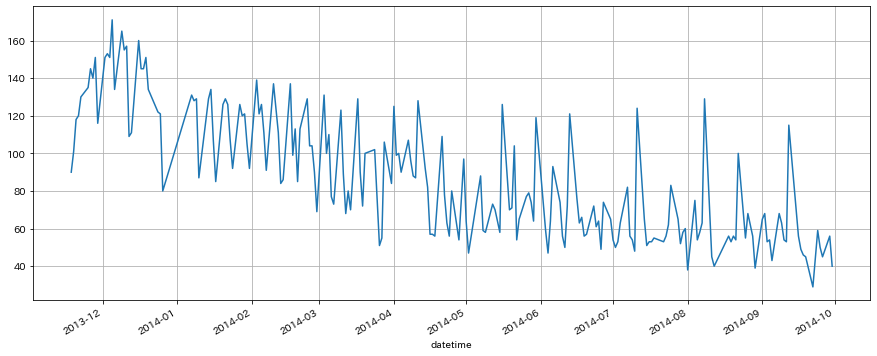

In [6]:
df_train['y'].plot(figsize=(15, 6), grid=True)

In [121]:
res = sm.tsa.seasonal_decompose(df_train['y'], period=5, model='multiplicative')

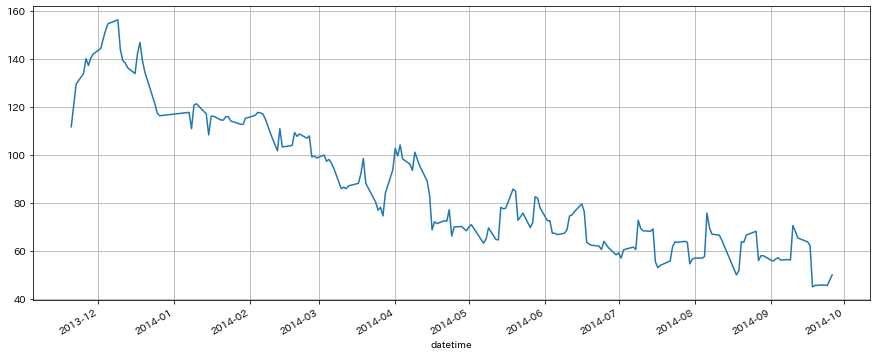

In [122]:
res.trend.plot(figsize=(15, 6), grid=True)

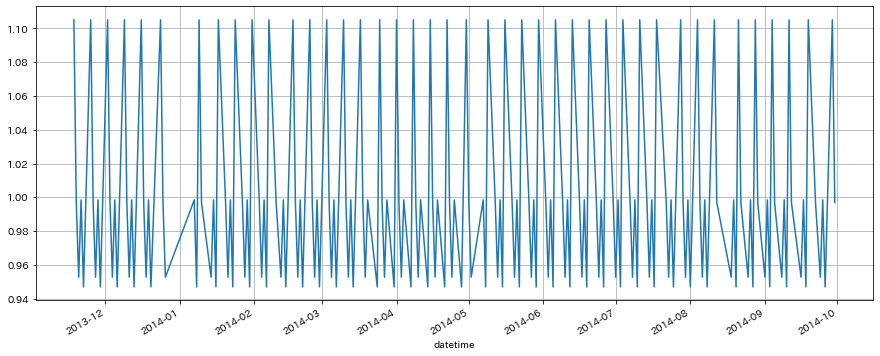

In [123]:
res.seasonal.plot(figsize=(15, 6), grid=True)

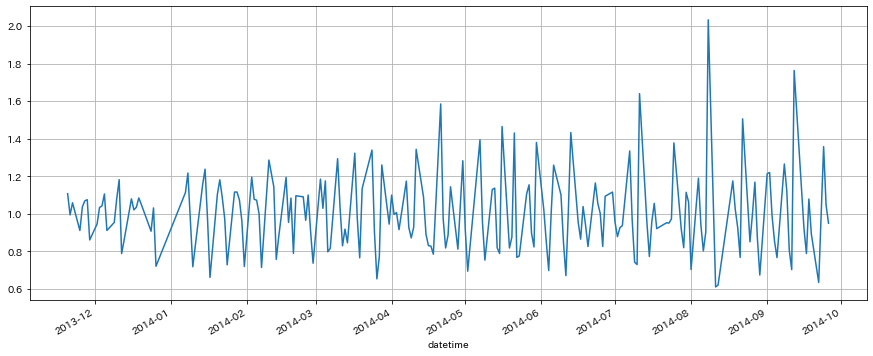

In [125]:
res.resid.plot(figsize=(15, 6), grid=True)

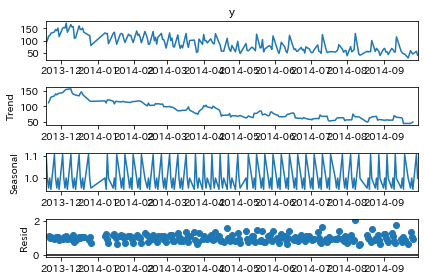

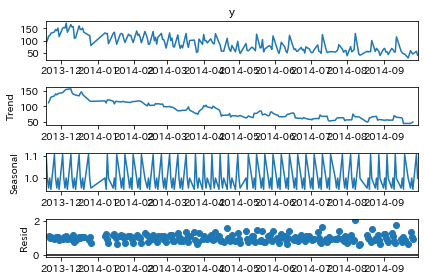

In [124]:
res.plot()

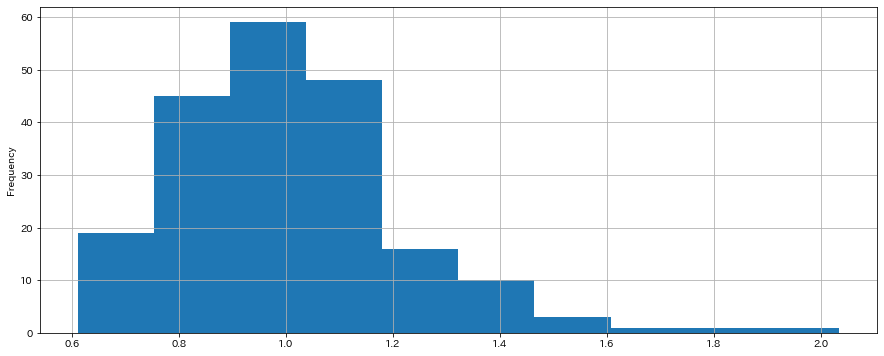

In [129]:
df_train['resid'] = res.resid
df_train['resid'].plot(kind='hist', figsize=(15, 6), grid=True)

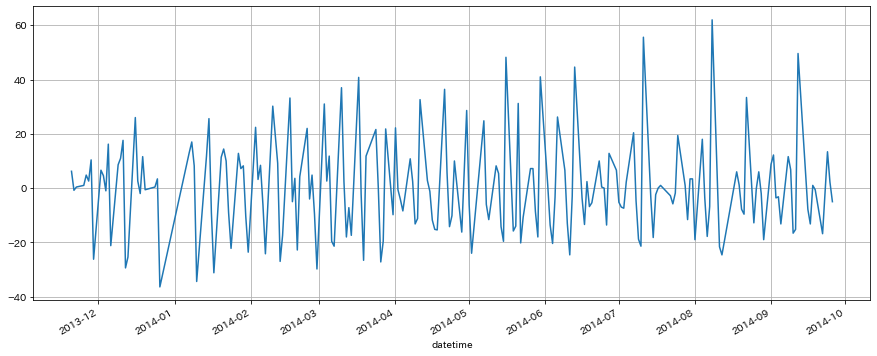

In [10]:
#df_train['seasonal'] = df_train['y'] - res.trend
#df_train['seasonal'].plot(figsize=(15, 6), grid=True)

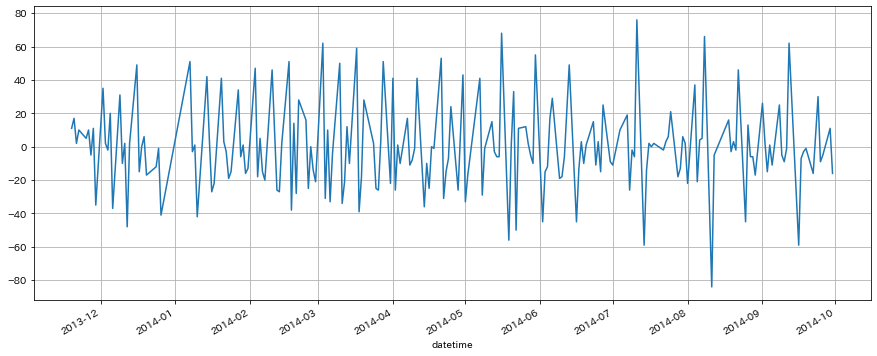

In [19]:
#df_train['y'].diff().dropna().plot(figsize=(15, 6), grid=True)

In [20]:
#df_train['diff'] = df_train['y'].diff()

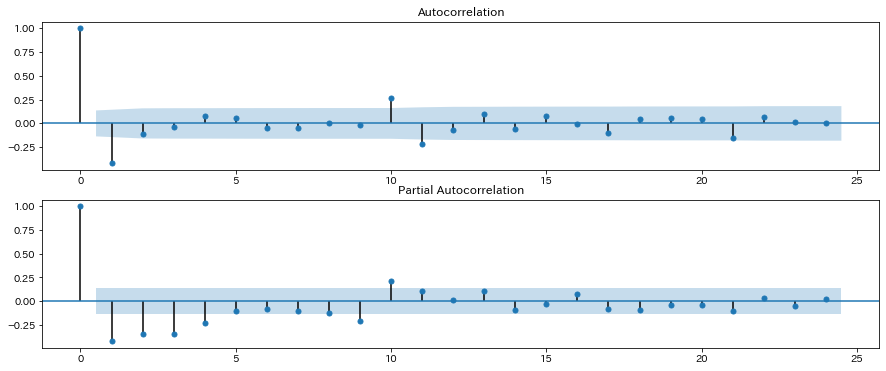

In [23]:
# 自己相関と偏自己相関
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_train['diff'].dropna(), ax=ax1, )

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_train['diff'].dropna(), ax=ax2)

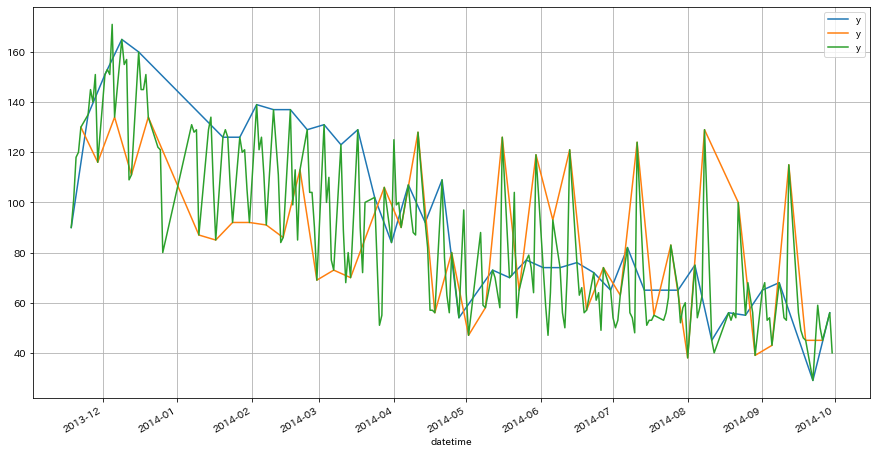

In [33]:
#df_train[df_train['week']=='月']['y'].plot(figsize=(15, 8), grid=True)
#df_train[df_train['week']=='火']['y'].plot(figsize=(15, 8), grid=True)
#df_train[df_train['week']=='水']['y'].plot(figsize=(15, 8), grid=True)
#df_train[df_train['week']=='木']['y'].plot(figsize=(15, 8), grid=True)
#df_train[df_train['week']=='金']['y'].plot(figsize=(15, 8), grid=True)
#df_train['y'].plot(figsize=(15, 8), grid=True)
#plt.legend()

In [40]:
#df_train['precipitation'].unique()

array(['--', '0.5', '0', '1.5', '1', '6', '6.5', '2.5'], dtype=object)

In [43]:
#df_train['precipitation'] = df_train['precipitation'].replace('--', 0)
#df_train['precipitation'] = df_train['precipitation'].astype(np.float)

In [44]:
#df_train['precipitation']

datetime
2013-11-18    0.0
2013-11-19    0.0
2013-11-20    0.0
2013-11-21    0.0
2013-11-22    0.0
             ... 
2014-09-24    0.0
2014-09-25    0.0
2014-09-26    0.0
2014-09-29    0.0
2014-09-30    0.0
Name: precipitation, Length: 207, dtype: float64

In [161]:
df_train['curry'] = df_train['name'].apply(lambda x : 1 if x.find("カレー") >=0 else 0)
df_test['curry'] = df_test['name'].apply(lambda x : 1 if x.find("カレー") >=0 else 0)

In [157]:
popular_menu = set(df_train[df_train['resid']>1.2].name)
unpopular_menu = set(df_train[df_train['resid']<0.7].name)

In [158]:
popular_menu

{'さんま辛味焼',
 'ひやしたぬきうどん・炊き込みご飯',
 'キーマカレー',
 'チキンカレー',
 'チーズハンバーグ',
 'ビーフシチュー',
 'ポークカレー',
 'マーボ豆腐',
 'ロコモコ丼',
 '名古屋味噌カツ',
 '和風ハンバーグ',
 '手作りロースカツ',
 '海老クリーミ―クノーデル',
 '牛肉筍煮',
 '白身魚のマスタード焼き',
 '肉じゃが',
 '豚味噌メンチカツ',
 '豚肉の生姜焼',
 '鶏の唐揚げおろしソース',
 '鶏肉の山賊焼き'}

In [159]:
unpopular_menu

{'たっぷりベーコンフライ',
 'サーモンフライ・タルタル',
 'チキンの辛味噌焼き',
 'チャプチェ',
 '厚切ハムカツ',
 '回鍋肉',
 '筑前煮',
 '肉団子クリームシチュー',
 '鶏の天ぷら'}

In [170]:
df_train['popular'] = df_train['name'].apply(lambda x : 1 if x in popular_menu else 0)
df_train['unpopular'] = df_train['name'].apply(lambda x : 1 if x in unpopular_menu else 0)
df_test['popular'] = df_test['name'].apply(lambda x : 1 if x in popular_menu else 0)
df_test['unpopular'] = df_test['name'].apply(lambda x : 1 if x in unpopular_menu else 0)

In [112]:
df_train = df_train.rename(columns = {'datetime':'ds'})
df_test = df_test.rename(columns = {'datetime':'ds'})
df_event = df_train[df_train['remarks']=='お楽しみメニュー'].loc[:,['ds', 'remarks']]
df_event = pd.concat([df_train[df_train['remarks']=='お楽しみメニュー'].loc[:,['ds', 'remarks']], df_test[df_test['remarks']=='お楽しみメニュー'].loc[:,['ds', 'remarks']]])

df_event = df_event.rename(columns = {'remarks':'holiday'})
df_event['lower_window'] = 0
df_event['upper_window'] = 0
df_event = df_event.reset_index(drop=True)
df_event

,ds,holiday,lower_window,upper_window
0,2014-3-28,お楽しみメニュー,0,0
1,2014-4-11,お楽しみメニュー,0,0
2,2014-4-25,お楽しみメニュー,0,0
3,2014-5-16,お楽しみメニュー,0,0
4,2014-5-30,お楽しみメニュー,0,0
5,2014-6-13,お楽しみメニュー,0,0
6,2014-6-27,お楽しみメニュー,0,0
7,2014-7-11,お楽しみメニュー,0,0
8,2014-7-25,お楽しみメニュー,0,0
9,2014-8-8,お楽しみメニュー,0,0


In [118]:
df_test['ds'] = pd.to_datetime(df_test['ds'])

,ds,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2014-10-01,水,1,メンチカツ,420.0,NaN,NaN,NaN,雨,0,20.2
1,2014-10-02,木,0,バーベキューチキン,415.0,NaN,NaN,NaN,曇,--,23.9
2,2014-10-03,金,0,豚肉のマスタード焼き,405.0,NaN,NaN,NaN,晴れ,--,28.7
3,2014-10-06,月,1,麻婆春雨,400.0,NaN,NaN,NaN,雨,0.5,21.5
4,2014-10-07,火,0,厚揚げ肉みそ炒め,430.0,NaN,NaN,NaN,晴れ,--,22.1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


"\nfuture_df['cap'] = 180\nfuture_df['floor'] = 20\nforecast_df = model.predict(future_df)\n\nmodel.plot(forecast_df)\nplt.show()\n#fig = model.plot(forecast_df)\n#a = fp.add_changepoints_to_plot(fig.gca(),model,forecast_df);\n"

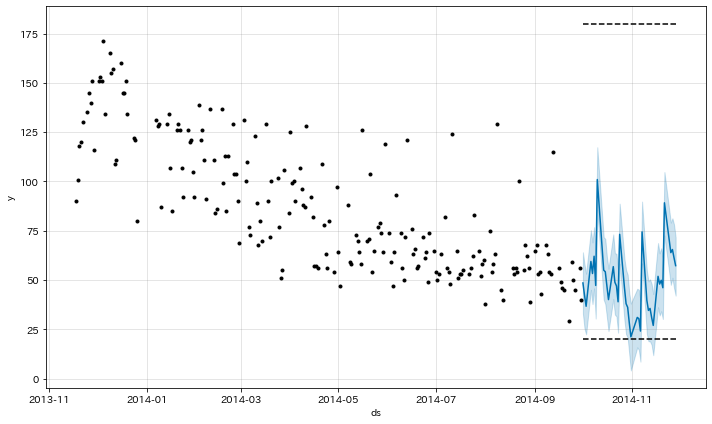

In [171]:
# prophet
model = Prophet(growth='logistic', seasonality_mode='multiplicative', 
                weekly_seasonality=True, yearly_seasonality=True,
                holidays=df_event, #holidays_prior_scale=10,
                #mcmc_samples=100, 
                #changepoint_prior_scale=1.0
                )
model.add_regressor('curry')
model.add_regressor('popular')
#model.add_regressor('unpopular')

df_train['cap'] = 180
df_train['floor'] = 20
model.fit(df_train)
#future_df = model.make_future_dataframe(40, freq='D')

df_test['cap'] = 180
df_test['floor'] = 20

forecast_df = model.predict(df_test)

model.plot(forecast_df)
#plt.show()
"""
future_df['cap'] = 180
future_df['floor'] = 20
forecast_df = model.predict(future_df)

model.plot(forecast_df)
plt.show()
#fig = model.plot(forecast_df)
#a = fp.add_changepoints_to_plot(fig.gca(),model,forecast_df);
"""

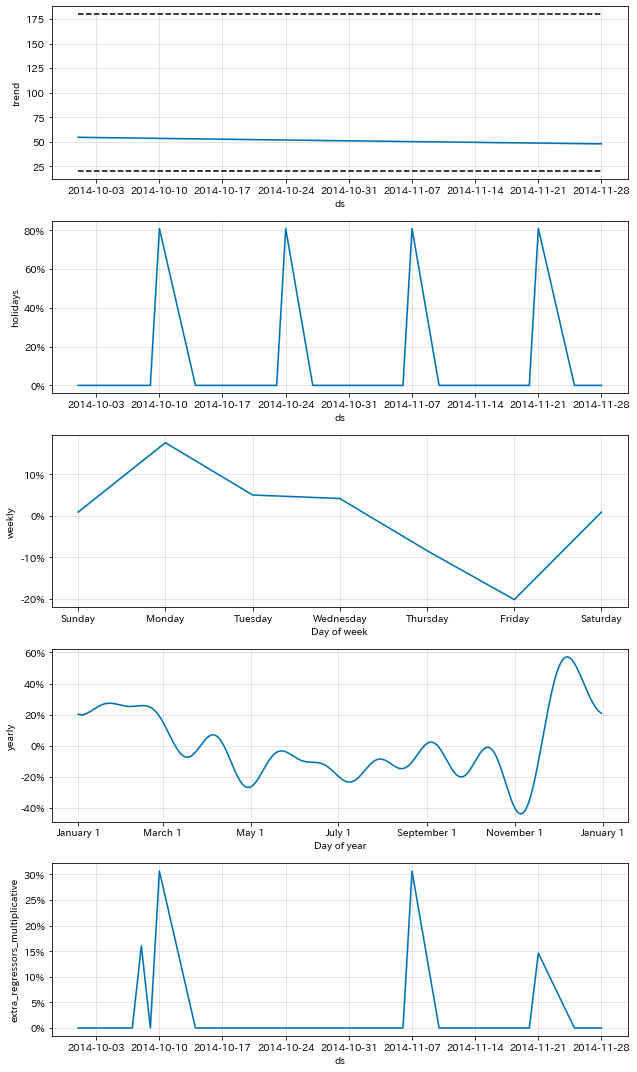

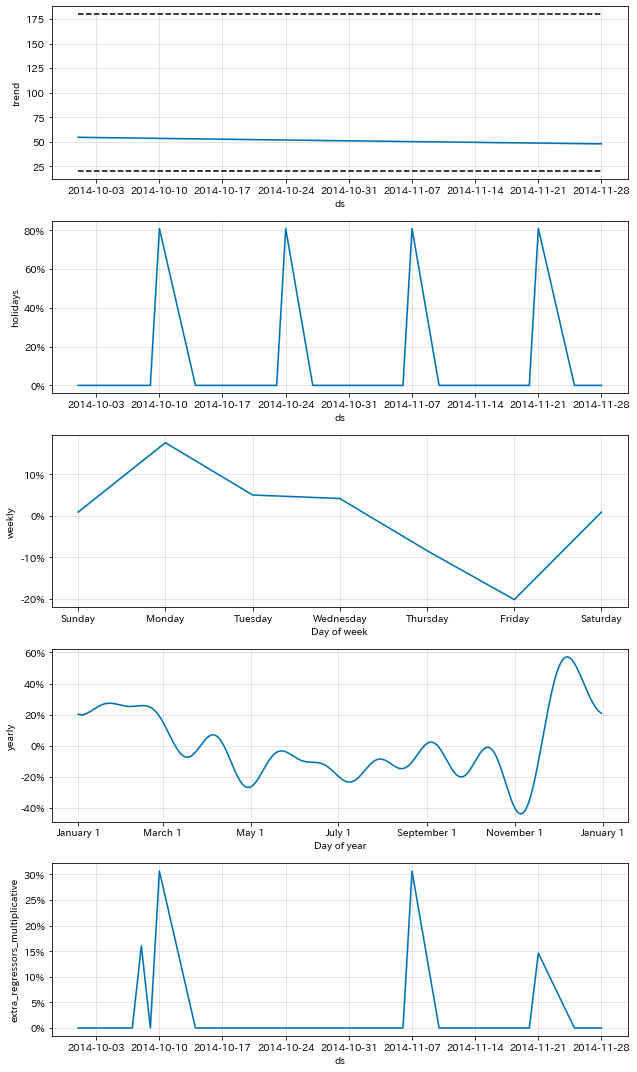

In [173]:
model.plot_components(forecast_df)

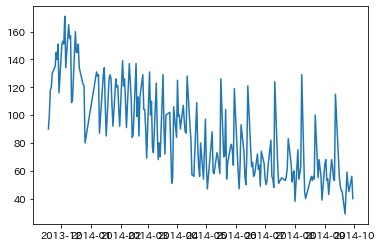

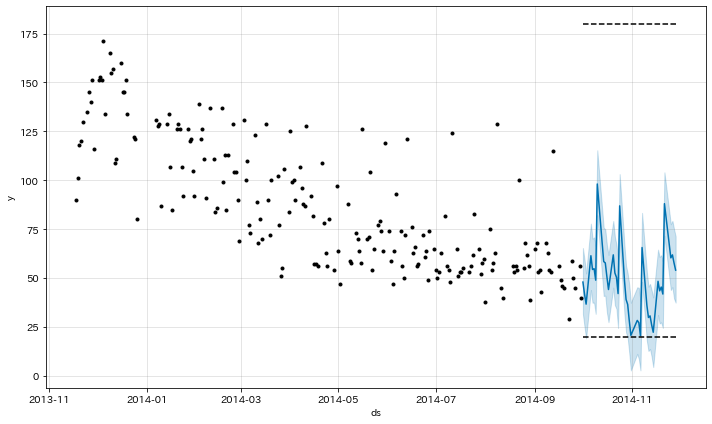

In [140]:
plt.plot(df_train['y'])
model.plot(forecast_df)
plt.show()

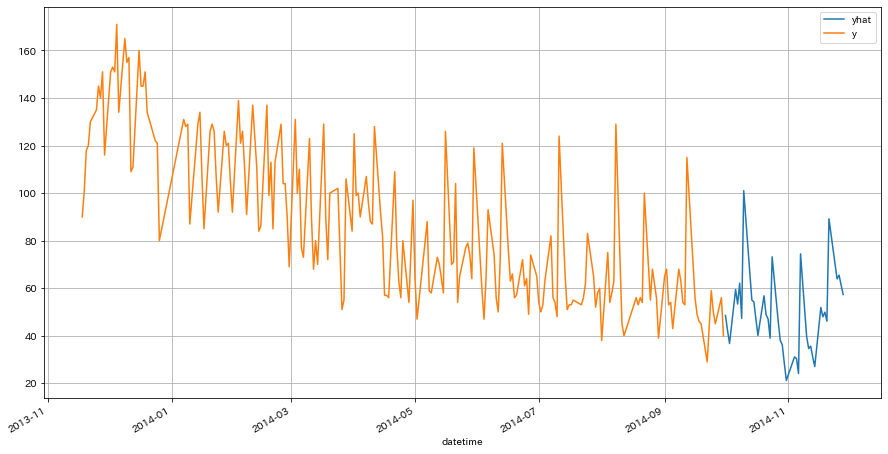

In [172]:
forecast_df.index = pd.to_datetime(forecast_df['ds'])
forecast_df['yhat'].plot(figsize=(15, 8), grid=True)
df_train['y'].plot(figsize=(15, 8), grid=True)
plt.legend()

In [142]:
forecast_df

,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,holidays,holidays_lower,...,yearly,yearly_lower,yearly_upper,お楽しみメニュー,お楽しみメニュー_lower,お楽しみメニュー_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2014-10-01,2014-10-01,52.567775,180,20,31.666861,65.422823,52.567775,52.567775,0.000000,0.000000,...,-0.147374,-0.147374,-0.147374,0.000000,0.000000,0.000000,0.0,0.0,0.0,48.014756
2014-10-02,2014-10-02,52.438082,180,20,25.109929,59.503866,52.438082,52.438082,0.000000,0.000000,...,-0.129524,-0.129524,-0.129524,0.000000,0.000000,0.000000,0.0,0.0,0.0,41.971543
2014-10-03,2014-10-03,52.308774,180,20,19.259974,52.437476,52.308774,52.308774,0.000000,0.000000,...,-0.109647,-0.109647,-0.109647,0.000000,0.000000,0.000000,0.0,0.0,0.0,36.736265
2014-10-06,2014-10-06,51.923164,180,20,43.974332,77.888315,51.923164,51.923164,0.000000,0.000000,...,-0.043273,-0.043273,-0.043273,0.000000,0.000000,0.000000,0.0,0.0,0.0,61.472831
2014-10-07,2014-10-07,51.795397,180,20,37.484868,70.165975,51.795397,51.795397,0.000000,0.000000,...,-0.020898,-0.020898,-0.020898,0.000000,0.000000,0.000000,0.0,0.0,0.0,54.445089
2014-10-08,2014-10-08,51.668016,180,20,37.483222,70.856696,51.668016,51.668016,0.000000,0.000000,...,0.000555,0.000555,0.000555,0.000000,0.000000,0.000000,0.0,0.0,0.0,54.836163
2014-10-09,2014-10-09,51.541019,180,20,31.765293,66.481468,51.541019,51.541019,0.000000,0.000000,...,0.020463,0.020463,0.020463,0.000000,0.000000,0.000000,0.0,0.0,0.0,48.984022
2014-10-10,2014-10-10,51.414406,180,20,82.188161,115.358721,51.414406,51.414406,1.058276,1.058276,...,0.038223,0.038223,0.038223,1.058276,1.058276,1.058276,0.0,0.0,0.0,98.121397
2014-10-14,2014-10-14,50.911800,180,20,40.899368,75.852366,50.911800,50.911800,0.000000,0.000000,...,0.077312,0.077312,0.077312,0.000000,0.000000,0.000000,0.0,0.0,0.0,58.516337


In [174]:
#y_pred = forecast_df.loc[207:, 'yhat'].values
y_pred = forecast_df['yhat'].values

In [175]:
sample = pd.read_csv('../output/sample.csv',header=None)
sample[1] = y_pred
sample.to_csv('../output/submit1.csv', index=None, header=None)

In [176]:
sample

,0,1
0,2014-10-1,48.534771
1,2014-10-2,42.367319
2,2014-10-3,36.708007
3,2014-10-6,59.443743
4,2014-10-7,53.328194
5,2014-10-8,62.098694
6,2014-10-9,47.274048
7,2014-10-10,100.997726
8,2014-10-14,55.035991
9,2014-10-15,54.213005


In [138]:
df_train['event'] = df_train['event'].fillna(0)
df_train[df_train['event']!=0]

,ds,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,cap,floor,resid
datetime,,,,,,,,,,,,,,,
2013-12-17,2013-12-17,145,火,0,手作りヒレカツ,NaN,NaN,ママの会,NaN,曇,--,10.8,180,20,1.021417
2014-01-17,2014-1-17,85,金,1,回鍋肉,430.0,NaN,ママの会,NaN,快晴,--,7.8,180,20,0.661924
2014-02-21,2014-2-21,113,金,0,酢豚orカレー,410.0,酢豚（28食）、カレー（85食）,ママの会,NaN,快晴,--,8.5,180,20,1.096852
2014-03-14,2014-3-14,70,金,1,カレイ野菜あんかけ,360.0,NaN,ママの会,NaN,曇,--,11.5,180,20,0.845834
2014-03-20,2014-3-20,100,木,1,鶏の親子煮,372.0,NaN,キャリアアップ支援セミナー,NaN,雨,0.5,7.5,180,20,1.135557
2014-04-18,2014-4-18,56,金,1,鶏の味噌漬け焼き,325.0,NaN,ママの会,NaN,曇,0,11.4,180,20,0.785538
2014-04-21,2014-4-21,109,月,0,牛肉筍煮,375.0,NaN,キャリアアップ支援セミナー,NaN,曇,--,16.4,180,20,1.585581
2014-05-16,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,23.8,180,20,1.465501
2014-05-19,2014-5-19,70,月,1,豚肉と茄子のピリ辛炒め,406.0,NaN,キャリアアップ支援セミナー,NaN,曇,--,22.8,180,20,0.818382
